In [2]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv("global_housing_market_dirty.csv")
df

,Country,Year,House Price Index,Rent Index,Affordability Ratio,Mortgage Rate (%),Inflation Rate (%),GDP Growth (%),Population Growth (%),Urbanization Rate (%),Construction Index,Random_Code,Seller_Notes
0,United States,2015.0,117.454012,NaN,9.587945,4.493292420985183,NaN,-0.752044,-0.796707,85.985284,118.089201,6560.0,Good
1,United States,2016.0,150.807258,51.440915,11.729189,5.662213204002109,1.880204,-0.545400,-0.358084,69.127267,111.980515,NaN,NaN
2,United States,2017.0,123.194502,70.386040,8.506676,2.1974693032602093 percent,2.398940,NaN,0.596245,83.555279,85.973903,4625.0,NaN
3,NaN,2018.0,131.423444,91.469020,NaN,nan percent,1.608407,NaN,2.321099,88.968961,134.671788,4266.0,Good
4,United States,2019.0,110.461377,56.837048,NaN,3.700762468698007%,1.293249,1.961415,-0.879640,87.279612,90.702399,3360.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,Russia,NaN,131.481735,75.146336,8.336558,nan percent,3.042030,5.755299,-0.096533,79.702100,96.015205,9212.0,NaN
296,NaN,2023.0,142.790039,55.723132,10.862208,6.104362002659066 percent,0.897007,0.215021,1.821704,82.447791,84.761682,2576.0,NaN
297,India,NaN,123.913491,76.386110,7.164118,3.0068893708207103 percent,5.359461,2.021763,NaN,86.987237,100.711298,5067.0,NaN
298,Russia,2023.0,84.157286,60.384024,11.879671,6.325593482180228%,0.532110,5.614494,1.236920,86.037549,106.379188,4506.0,NaN


In [4]:
def col(value):
    value=value.replace(" ","_")
    value=value.lower()
    value=value.strip()
    return value
df.columns = pd.Series(df.columns).apply(col)
df.columns

Index(['country', 'year', 'house_price_index', 'rent_index',
       'affordability_ratio', 'mortgage_rate_(%)', 'inflation_rate_(%)',
       'gdp_growth_(%)', 'population_growth_(%)', 'urbanization_rate_(%)',
       'construction_index', 'random_code', 'seller_notes'],
      dtype='object')

In [5]:
df.drop(columns=['random_code','seller_notes'],inplace = True)
df

,country,year,house_price_index,rent_index,affordability_ratio,mortgage_rate_(%),inflation_rate_(%),gdp_growth_(%),population_growth_(%),urbanization_rate_(%),construction_index
0,United States,2015.0,117.454012,NaN,9.587945,4.493292420985183,NaN,-0.752044,-0.796707,85.985284,118.089201
1,United States,2016.0,150.807258,51.440915,11.729189,5.662213204002109,1.880204,-0.545400,-0.358084,69.127267,111.980515
2,United States,2017.0,123.194502,70.386040,8.506676,2.1974693032602093 percent,2.398940,NaN,0.596245,83.555279,85.973903
3,NaN,2018.0,131.423444,91.469020,NaN,nan percent,1.608407,NaN,2.321099,88.968961,134.671788
4,United States,2019.0,110.461377,56.837048,NaN,3.700762468698007%,1.293249,1.961415,-0.879640,87.279612,90.702399
...,...,...,...,...,...,...,...,...,...,...,...
295,Russia,NaN,131.481735,75.146336,8.336558,nan percent,3.042030,5.755299,-0.096533,79.702100,96.015205
296,NaN,2023.0,142.790039,55.723132,10.862208,6.104362002659066 percent,0.897007,0.215021,1.821704,82.447791,84.761682
297,India,NaN,123.913491,76.386110,7.164118,3.0068893708207103 percent,5.359461,2.021763,NaN,86.987237,100.711298
298,Russia,2023.0,84.157286,60.384024,11.879671,6.325593482180228%,0.532110,5.614494,1.236920,86.037549,106.379188


In [6]:
mrv=df['mortgage_rate_(%)'].str.split() #mrv=mortgage_rate value only
df['mortgage_rate_(%)']=mrv.str.get(0)
df['mortgage_rate_(%)'] = np.where(df['mortgage_rate_(%)'].str.endswith('%'),df['mortgage_rate_(%)'],df['mortgage_rate_(%)']+'%')
df.replace('nan%', np.nan, inplace=True)

In [7]:
df['country'] = df['country'].str.strip()

In [8]:
df=df.dropna(subset=['year', 'country'])

In [9]:
df.drop(
    index=df[(df.duplicated(subset=['country', 'year'], keep=False)) & (df.isnull().any(axis=1))].index,
    inplace=True
)

C:\Users\ahmed\AppData\Local\Temp\ipykernel_12408\636920359.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(


In [10]:
df.drop(index=df[df.duplicated(subset=['country', 'year'])].index, inplace=True)
df

C:\Users\ahmed\AppData\Local\Temp\ipykernel_12408\1397150291.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(index=df[df.duplicated(subset=['country', 'year'])].index, inplace=True)


,country,year,house_price_index,rent_index,affordability_ratio,mortgage_rate_(%),inflation_rate_(%),gdp_growth_(%),population_growth_(%),urbanization_rate_(%),construction_index
0,United States,2015.0,117.454012,NaN,9.587945,4.493292420985183%,NaN,-0.752044,-0.796707,85.985284,118.089201
1,United States,2016.0,150.807258,51.440915,11.729189,5.662213204002109%,1.880204,-0.545400,-0.358084,69.127267,111.980515
2,United States,2017.0,123.194502,70.386040,8.506676,2.1974693032602093%,2.398940,NaN,0.596245,83.555279,85.973903
4,United States,2019.0,110.461377,56.837048,NaN,3.700762468698007%,1.293249,1.961415,-0.879640,87.279612,90.702399
5,United States,2020.0,146.252228,71.819775,7.680612,4.233551396716399%,1.701554,5.756677,1.712965,88.184968,141.586188
...,...,...,...,...,...,...,...,...,...,...,...
263,Russia,2018.0,131.481735,75.146336,8.336558,2.3176193629251136%,3.042030,5.755299,-0.096533,79.702100,96.015205
273,Sweden,2015.0,111.130770,92.723365,9.445356,2.8631200036676687%,3.188069,-1.024911,-0.365977,80.433536,84.515068
285,Germany,2018.0,101.582103,93.602333,3.768127,1.7584086058430386%,3.953805,2.325081,1.231005,81.782740,148.068166
290,Italy,2017.0,102.359584,117.425578,3.109390,6.349394133538195%,0.780539,5.129145,0.846954,89.788944,75.903725


In [11]:
df=df.sort_values(by=['country', 'year']).reset_index(drop=True)

<Axes: xlabel='house_price_index', ylabel='Count'>

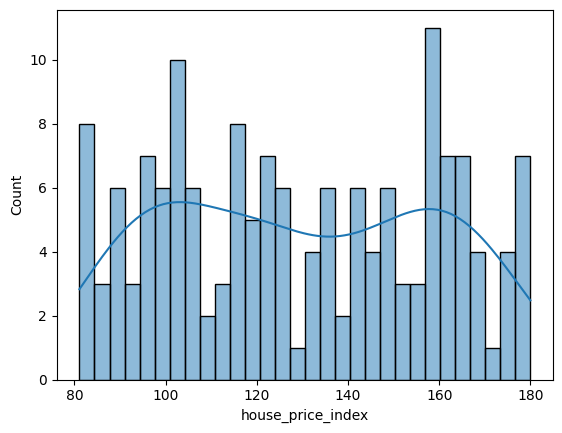

In [12]:
import seaborn as sns
sns.histplot(df['house_price_index'], bins=30, kde=True)

In [13]:
df['house_price_index'] = df['house_price_index'].fillna(df['house_price_index'].mean())

<Axes: xlabel='rent_index', ylabel='Count'>

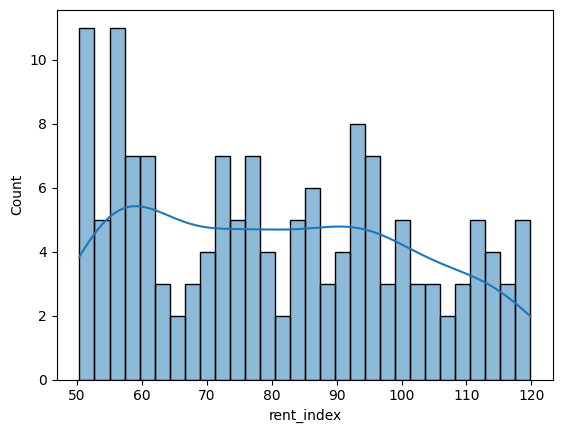

In [14]:
sns.histplot(df['rent_index'], bins=30, kde=True)

In [15]:
df['rent_index'] = df['rent_index'].fillna(df['rent_index'].median())

<Axes: xlabel='affordability_ratio', ylabel='Count'>

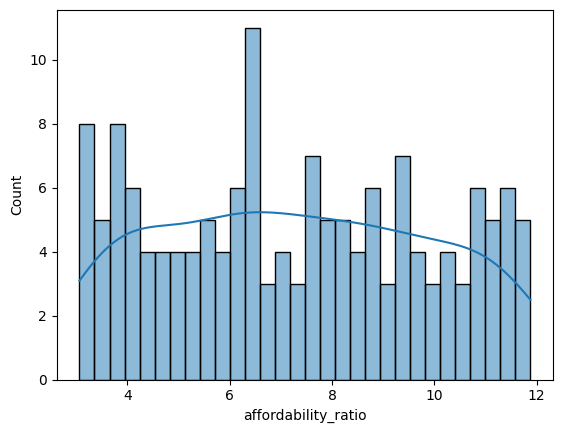

In [16]:
sns.histplot(df['affordability_ratio'], bins=30, kde=True)

In [17]:
df['affordability_ratio'] = df['affordability_ratio'].fillna(df['affordability_ratio'].median())

<Axes: xlabel='mortgage_rate_(%)', ylabel='Count'>

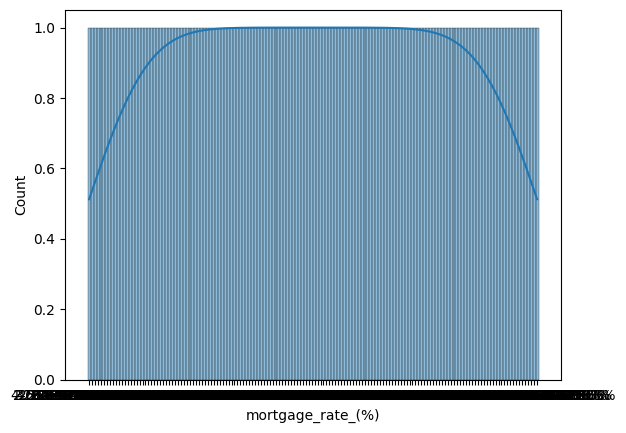

In [18]:
sns.histplot(df['mortgage_rate_(%)'], bins=30, kde=True)

In [19]:
df['mortgage_rate_(%)']=df['mortgage_rate_(%)'].str.rstrip("%")
df['mortgage_rate_(%)'] = pd.to_numeric(df['mortgage_rate_(%)'], errors='coerce')
df['mortgage_rate_(%)'] = df['mortgage_rate_(%)'].fillna(df['mortgage_rate_(%)'].median())
df['mortgage_rate_(%)']=df['mortgage_rate_(%)'].astype(str) + '%'

<Axes: xlabel='inflation_rate_(%)', ylabel='Count'>

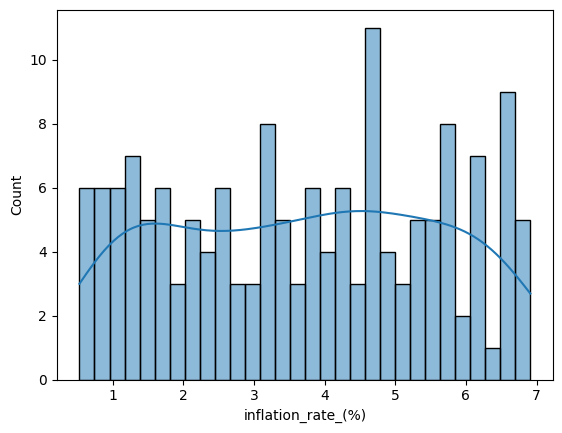

In [20]:
sns.histplot(df['inflation_rate_(%)'], bins=30, kde=True)

In [21]:
df['inflation_rate_(%)'] = df['inflation_rate_(%)'].fillna(df['inflation_rate_(%)'].median())
df['inflation_rate_(%)']=df['inflation_rate_(%)'].astype(str) + '%'

<Axes: xlabel='gdp_growth_(%)', ylabel='Count'>

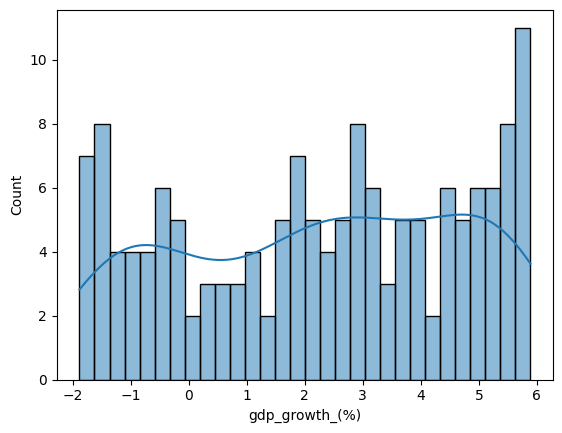

In [22]:
sns.histplot(df['gdp_growth_(%)'], bins=30, kde=True)

In [23]:
df['gdp_growth_(%)'] = df['gdp_growth_(%)'].fillna(df['gdp_growth_(%)'].median())
df['gdp_growth_(%)']=df['gdp_growth_(%)'].astype(str) + '%'

<Axes: xlabel='population_growth_(%)', ylabel='Count'>

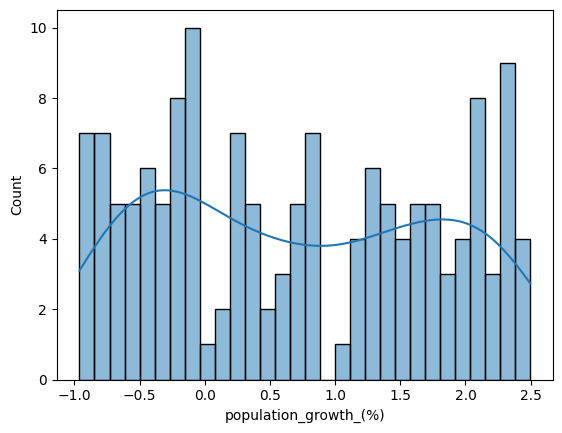

In [24]:
sns.histplot(df['population_growth_(%)'], bins=30, kde=True)

In [25]:
df['population_growth_(%)'] = df['population_growth_(%)'].fillna(df['population_growth_(%)'].median())
df['population_growth_(%)']=df['population_growth_(%)'].astype(str) + '%'

<Axes: xlabel='urbanization_rate_(%)', ylabel='Count'>

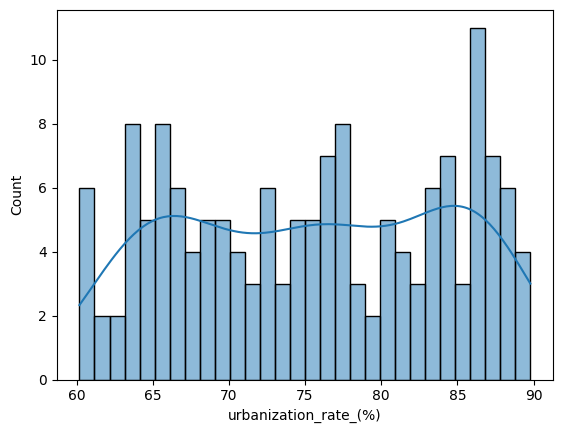

In [26]:
sns.histplot(df['urbanization_rate_(%)'], bins=30, kde=True)

In [27]:
df['urbanization_rate_(%)'] = df['urbanization_rate_(%)'].fillna(df['urbanization_rate_(%)'].median())
df['urbanization_rate_(%)']=df['urbanization_rate_(%)'].astype(str) + '%'

<Axes: xlabel='construction_index', ylabel='Count'>

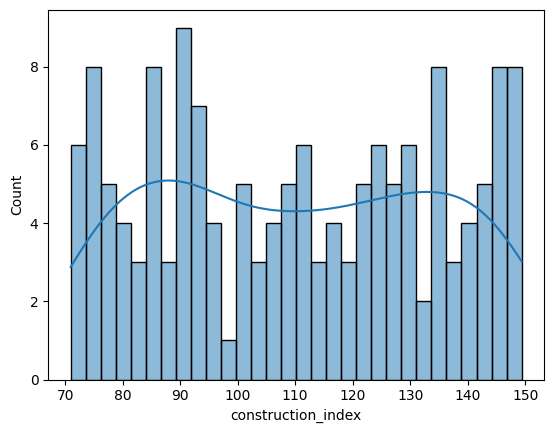

In [28]:
sns.histplot(df['construction_index'], bins=30, kde=True)

In [29]:
df['construction_index'] = df['construction_index'].fillna(df['construction_index'].median())

In [30]:
df.columns[df.isnull().any()]

Index([], dtype='object')

In [31]:
df

,country,year,house_price_index,rent_index,affordability_ratio,mortgage_rate_(%),inflation_rate_(%),gdp_growth_(%),population_growth_(%),urbanization_rate_(%),construction_index
0,Australia,2015.0,151.334959,112.664479,7.605097,4.160567426326578%,1.1966180737085443%,1.5792989345876371%,0.6460270229564072%,67.27411510904189%,91.539458
1,Australia,2016.0,129.358539,51.404984,5.898712,2.557240034982723%,2.6287327891564454%,-1.0419029454459905%,2.1168454825896323%,77.80777360662145%,124.328186
2,Australia,2017.0,158.917124,84.890954,3.782283,4.185532709092739%,4.314467267135715%,3.96351579347464%,0.5108084118038778%,63.82740908386691%,92.702072
3,Australia,2018.0,116.308230,95.214207,8.137005,3.2804836294892312%,6.912349117154368%,2.846198554855097%,-0.1697062289240193%,63.05347417861211%,82.228731
4,Australia,2019.0,104.595773,61.247696,4.679103,2.9254758434692354%,3.823725592596096%,5.174123397011401%,-0.7191818901842523%,75.73534168710763%,102.831746
...,...,...,...,...,...,...,...,...,...,...,...
159,United States,2020.0,146.252228,71.819775,7.680612,4.233551396716399%,1.7015539609159258%,5.7566770221164685%,1.712964881763901%,88.18496824692568%,141.586188
160,United States,2021.0,139.789998,114.531196,3.796433,2.479914312095726%,0.7939773779184974%,0.6026426461061147%,0.360370513913187%,68.14047095321688%,136.299001
161,United States,2022.0,115.675333,69.665416,7.884265,2.204621124873813%,5.714280374901258%,-1.4035948505618334%,2.4541042781018105%,83.16734307889972%,85.897255
162,United States,2023.0,129.358539,80.029582,9.361716,5.145035840204937%,5.513257253458647%,-1.4076427861272771%,0.2546300499049541%,63.47607178575389%,139.048274
